# Calculation of Variances 
 - I used the exported tables from both Seatfinder_DataMerging.ipynb and Seatfinder_DataCleaning.ipynb

Helper functions 

In [1]:
import pandas as pd 

# Function to load a CSV file
def load_csv_file(file_path):
    """Loads a CSV file into a pandas DataFrame and returns it."""
    try:
        df = pd.read_csv(file_path)
        # print(f"Successfully loaded '{file_path}'. Head of the DataFrame:")
        # print(df.head())
        return df
    except FileNotFoundError:
        print(f"Error: The file '{file_path}' was not found. Please check the path.")
        return None
    except Exception as e:
        print(f"An error occurred while loading the CSV: {e}")
        return None


In [2]:
dataset = load_csv_file("data/final_data.csv")

In [3]:
dataset.head()

t10  location_id  estimated_seats  freeseats  manual_count  \
0  2016-04-12 13:00:00            3              NaN        NaN           NaN   
1  2016-04-12 13:00:00            4              NaN        NaN           NaN   
2  2016-04-12 13:00:00            5              NaN        NaN           NaN   
3  2016-04-12 13:00:00            6              NaN        NaN           NaN   
4  2016-04-12 13:00:00            7              NaN        NaN           NaN   

   freeseats_manual  numberofclients longname  availableseats  Unnamed: 14  \
0               NaN               32  UBB2HLS        48.52493          NaN   
1               NaN               16    UBA3A        48.52492          NaN   
2               NaN               41    UBA3C        48.52455          NaN   
3               NaN               21    UBA4A        48.52492          NaN   
4               NaN               16    UBA4B        48.52474          NaN   

    Opening   Closing  building_id  is_hill  relative_availability  
0  08:00:00  20:00:00            4        0                    NaN  
1  08:00:00  00:00:00            1        0                    NaN  
2  08:00:00  00:00:00            1        0                    NaN  
3  08:00:00  00:00:00            1        0                    NaN  
4  08:00:00  00:00:00            1        0                    NaN

## (1) Calculation of Estimation Errors

For this analysis, I'll calculate the errors between the estimated seats and the manual count for all records where manual count data is available.

**Key metrics to compute:**
- **Absolute Error**: `|estimated_seats - manual_count|`
- **Relative Error**: `(|estimated_seats - manual_count| / manual_count) × 100%`
- **Mean Absolute Error (MAE)**: Average absolute error across all records with manual counts
- **Root Mean Squared Error (RMSE)**: Square root of the mean of squared errors

**Filtering criteria:**
- Only rows where `manual_count` is not NaN
- Only rows where `estimated_seats` is not NaN

**Expected outcomes:**
- Error statistics aggregated by location and time period
- Distribution analysis of errors to assess model reliability
- Identification of locations with consistently high or low estimation accuracy

In [4]:
# Filter data where both estimated_seats and manual_count are available
df_with_manual = dataset.dropna(subset=['estimated_seats', 'manual_count'])

# Calculate errors
df_with_manual['absolute_error'] = abs(df_with_manual['estimated_seats'] - df_with_manual['manual_count'])
df_with_manual['relative_error'] = (df_with_manual['absolute_error'] / df_with_manual['manual_count']) * 100

# Calculate key metrics
mae = df_with_manual['absolute_error'].mean()
rmse = (df_with_manual['absolute_error'] ** 2).mean() ** 0.5

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Error statistics by location:")
print(df_with_manual.groupby('location_id')[['absolute_error', 'relative_error']].agg(['mean', 'std', 'min', 'max']))

Mean Absolute Error (MAE): 3.22
Root Mean Squared Error (RMSE): 4.92
Error statistics by location:
            absolute_error                      relative_error              \
                      mean       std  min   max           mean         std   
location_id                                                                  
3                 5.500000  7.148795  0.0  32.0      38.076219   87.160622   
4                 2.758621  2.293705  0.0   9.0      26.266772   21.374273   
5                 5.827586  7.977956  0.0  39.0      17.471477   17.636863   
6                 3.333333  3.452981  0.0  13.0      27.626143   27.093469   
7                 3.250000  2.633474  0.0  10.0      24.406152   19.858634   
9                 2.576923  1.836803  0.0   6.0      32.858947   26.540583   
10                3.592593  4.059739  0.0  20.0      32.237008   27.196873   
11                2.740741  2.176670  0.0   9.0      27.349278   22.721529   
12                2.307692  2.478213  0.0  

C:\Users\User\AppData\Local\Temp\ipykernel_10396\3180441900.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_manual['absolute_error'] = abs(df_with_manual['estimated_seats'] - df_with_manual['manual_count'])
C:\Users\User\AppData\Local\Temp\ipykernel_10396\3180441900.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_manual['relative_error'] = (df_with_manual['absolute_error'] / df_with_manual['manual_count']) * 100


## Interpretation of MAE and RMSE

(Report of typical occupancy (medians means etc.))

The automated estimates differ from manual counts by an average of 3.2 people (MAE). The RMSE of 4.9 people indicates that while most estimates are close to the observed values, occasional larger deviations occur. Overall, the system demonstrates good accuracy in absolute terms, with errors that are small relative to typical library occupancy. 

## Interpretation of error statistics by location

(Report of typical occupancy per location, number of observations per location)

Error analysis by location shows that estimation accuracy is generally high but varies across sites. Most locations exhibit mean absolute errors between 2 and 4 people, indicating close agreement with manual counts. A small number of locations show higher average errors and greater variability, with occasional large deviations. Relative error metrics display high variance and extreme values, particularly at low occupancy levels and during zero-count periods, where percentage-based measures are unstable. Overall, absolute error provides a more reliable indicator of performance, and results suggest good accuracy for most locations with localized areas for improvement.

In [5]:
# show all rows in df_with_manual with manual_count = 0
pd.set_option('display.max_rows', None)
print(df_with_manual[df_with_manual['manual_count'] == 0])   

                       t10  location_id  estimated_seats  freeseats  \
19344  2016-04-25 23:00:00           14              1.0       21.0   
20590  2016-04-26 20:20:00           16              2.0       29.0   
20779  2016-04-26 23:00:00           13              0.0       35.0   
20782  2016-04-26 23:00:00           16              0.0       31.0   
23427  2016-04-28 19:50:00           16              3.0       28.0   

       manual_count  freeseats_manual  numberofclients longname  \
19344           0.0              22.0                2    UBA6C   
20590           0.0              31.0                3    UBWZB   
20779           0.0              35.0                0    UBA6B   
20782           0.0              31.0                0    UBWZB   
23427           0.0              31.0                4    UBWZB   

       availableseats  Unnamed: 14   Opening   Closing  building_id  is_hill  \
19344        48.52455          NaN  08:00:00  00:00:00            1        0   
20590     

## Interpretation/Justification of inf and NaN relative error:

Five observations had a manual count of zero, for which relative error is undefined. In two of these cases, the estimated occupancy was also zero, indicating perfect agreement. In the remaining three cases, the system reported 1–3 people when the library was empty, reflecting a small positive bias at very low occupancy. These errors are minor in absolute terms and suggest occasional false positives rather than systematic failure.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## (2) Variances of relative_availabilty

For this analysis I calculate the mean estimations (+ variances) for every single day of the year over the years available to us (except for the COVID19-years).

**Key metrics to compute:**
- **Mean** - Mean `relative_availabilty` for every day of the year
- **Variance** - Variance of these means
- **Mean** - Mean `relative_availabilty` for every day of the year seperated by `location_id`
- **Variance** - Variance of the means for these means (also seperated by `location_id`)

**Filtering criteria:**
- Only rows where `relative_availabilty` is not NaN
- No Covid19-years (already filtered in the .csv-file used)

**Outcomes:**
- Means and respective variances numerical
- Plot with single locations and one general mean (+ variances)



Overall mean across all weeks and weekdays: 0.685
Overall std across all weeks and weekdays: 0.118
Overall variance across all weeks and weekdays: 0.014

Per-location mean and variance (week + weekday):
             mean_of_weekday_week_means  variance_of_weekday_week_means
location_id                                                            
3                              0.667193                        0.017826
4                              0.662382                        0.015013
5                              0.740786                        0.016274
6                              0.591381                        0.017290
7                              0.503250                        0.015275
9                              0.660637                        0.013056
10                             0.595664                        0.018456
11                             0.635796                        0.016508
12                             0.679423                        0.016169
13   

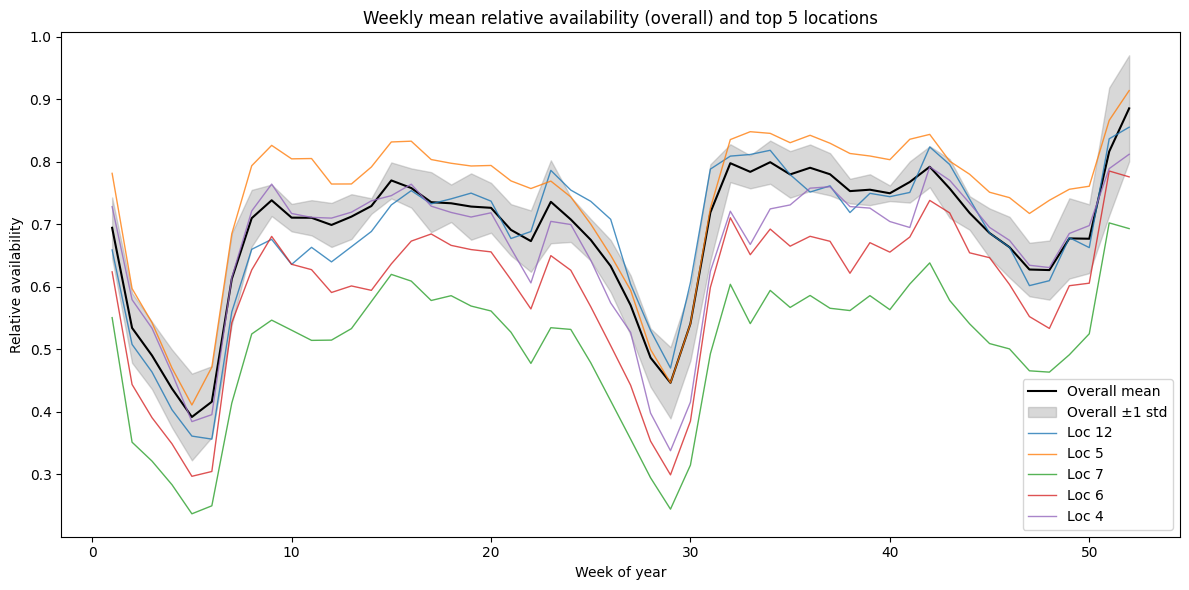

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# --- 1. Prepare data ---
df = dataset.copy()
df = df.dropna(subset=['relative_availability']).copy()  # now use relative_availability

# Convert timestamp to datetime
df['t10'] = pd.to_datetime(df['t10'])

# Extract week of year and weekday
df['week_of_year'] = df['t10'].dt.isocalendar().week
df['weekday'] = df['t10'].dt.weekday  # 0=Monday, 6=Sunday

# --- 2. Daily mean per week+weekday ---
daily = df.groupby(['week_of_year', 'weekday'])['relative_availability'].mean().reset_index()
daily_pivot = daily.pivot(index='week_of_year', columns='weekday', values='relative_availability')

# Overall mean & variance across all week+weekday combinations
overall_mean = daily['relative_availability'].mean()
overall_std = daily['relative_availability'].std()
overall_variance = daily['relative_availability'].var()

print(f"Overall mean across all weeks and weekdays: {overall_mean:.3f}")
print(f"Overall std across all weeks and weekdays: {overall_std:.3f}")
print(f"Overall variance across all weeks and weekdays: {overall_variance:.3f}\n")

# --- 3. Per-location stats: mean & variance per location across weeks+weekdays ---
loc_weekday = df.groupby(['location_id', 'week_of_year', 'weekday'])['relative_availability'].mean().reset_index()
pivot_loc = loc_weekday.pivot_table(index=['week_of_year', 'weekday'], columns='location_id', values='relative_availability')

location_means = pivot_loc.mean(axis=0, skipna=True)
location_variances = pivot_loc.var(axis=0, skipna=True)

location_stats = pd.DataFrame({
    'mean_of_weekday_week_means': location_means,
    'variance_of_weekday_week_means': location_variances
})

print("Per-location mean and variance (week + weekday):")
print(location_stats)

# --- 4. Plot overall mean ± std and top 5 locations ---
top_locs = df['location_id'].value_counts().nlargest(5).index

plt.figure(figsize=(12,6))

# Overall mean and ±1 std (flatten daily pivot)
overall_means_flat = daily_pivot.mean(axis=1)  # mean across weekdays for each week
overall_std_flat = daily_pivot.std(axis=1)

plt.plot(daily_pivot.index, overall_means_flat, color='black', label='Overall mean')
plt.fill_between(daily_pivot.index,
                 overall_means_flat - overall_std_flat,
                 overall_means_flat + overall_std_flat,
                 color='gray', alpha=0.3, label='Overall ±1 std')

# Plot top 5 locations
for loc in top_locs:
    if loc in pivot_loc.columns:
        # Average over weekdays to get weekly mean
        series = pivot_loc[loc].groupby('week_of_year').mean()
        plt.plot(series.index, series.values, alpha=0.8, lw=1, label=f'Loc {loc}')

plt.xlabel('Week of year')
plt.ylabel('Relative availability')
plt.title('Weekly mean relative availability (overall) and top 5 locations')
plt.legend()
plt.tight_layout()
plt.show()


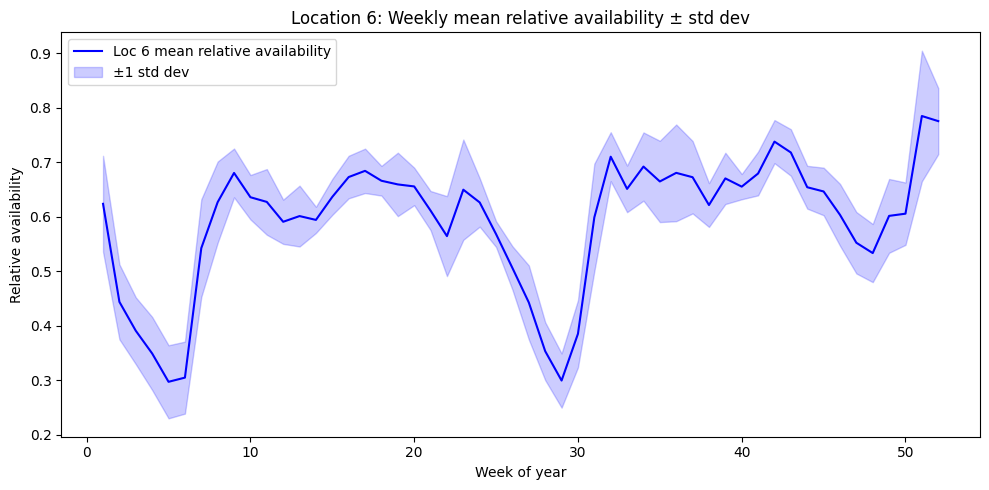

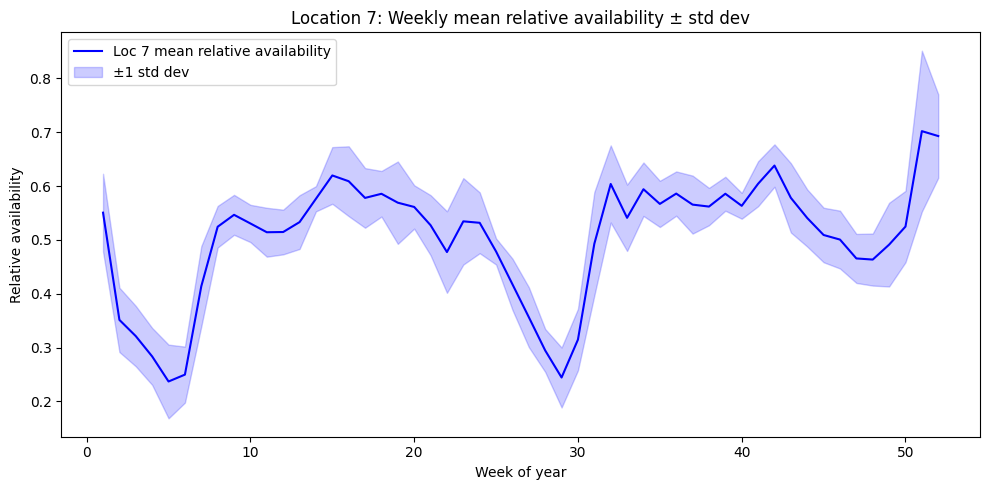

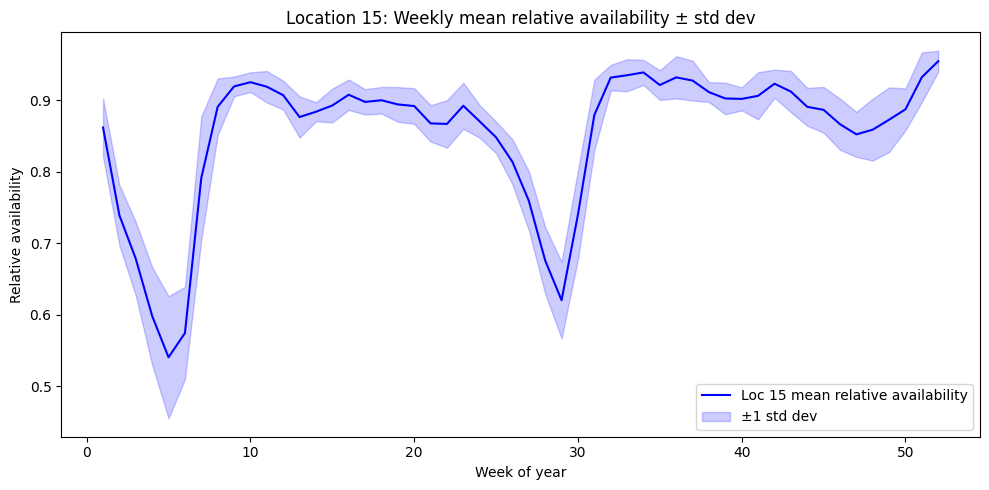

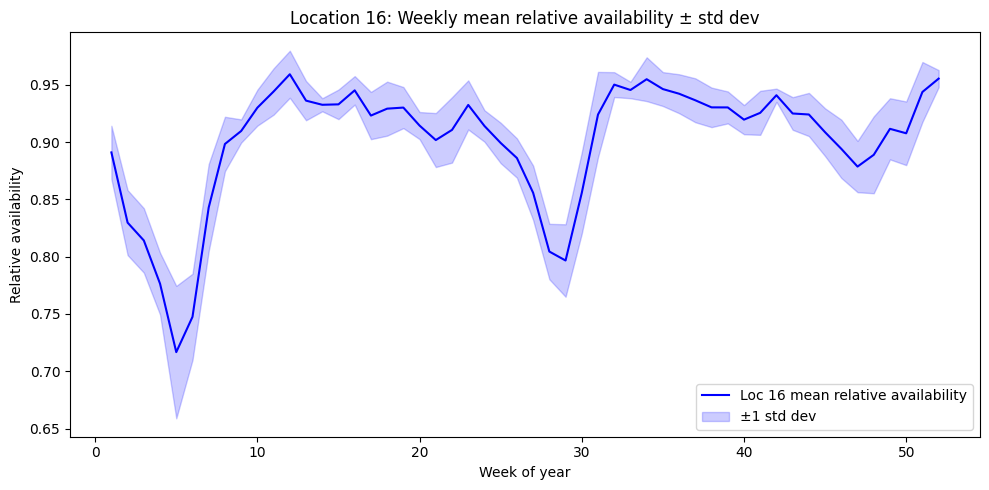

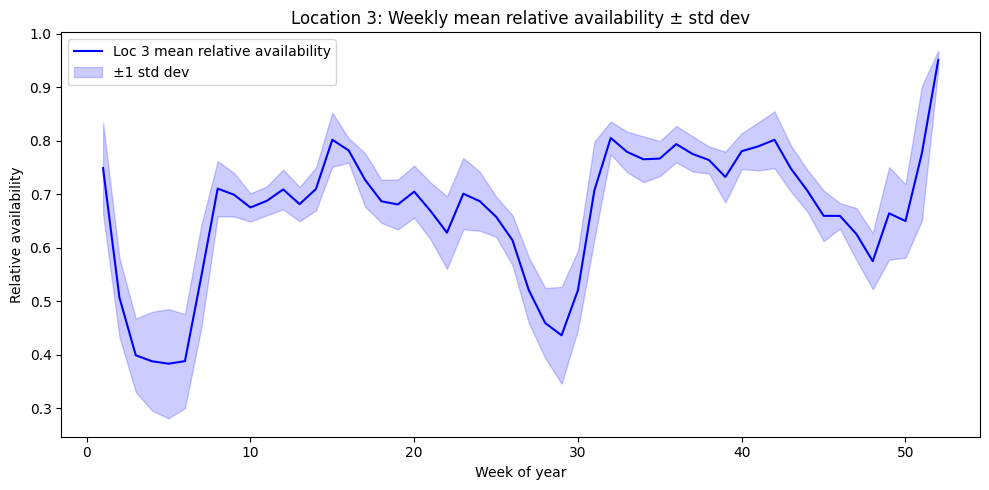

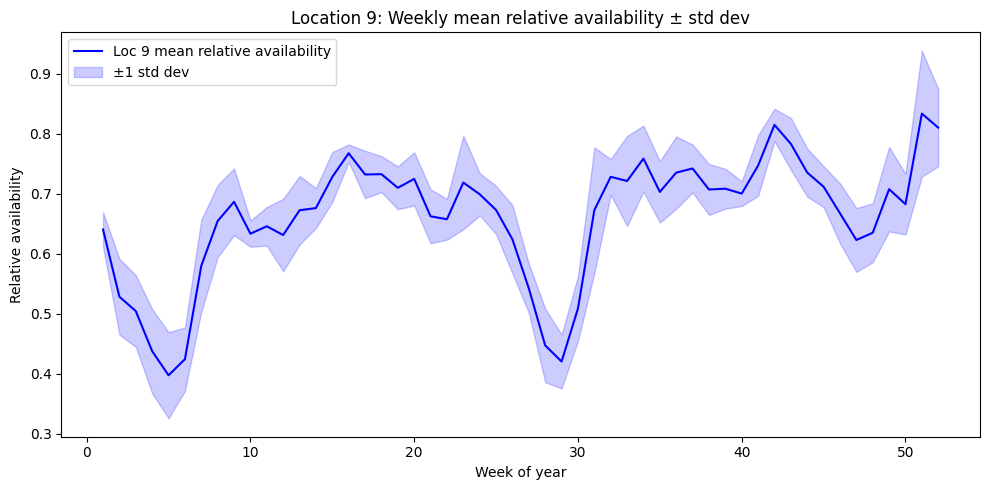

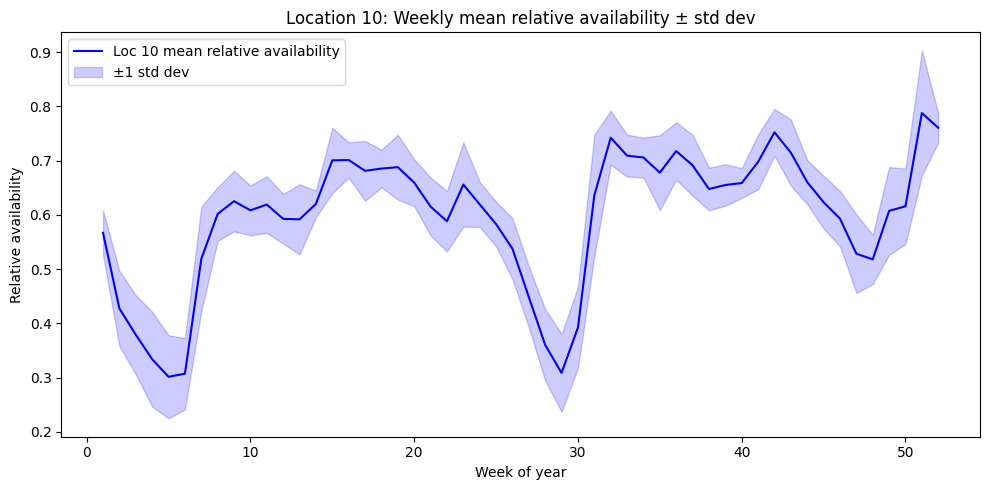

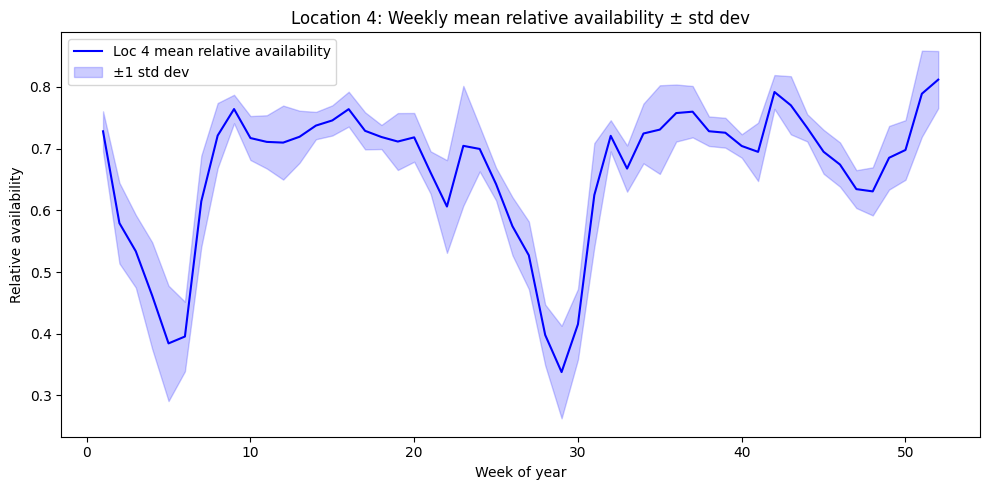

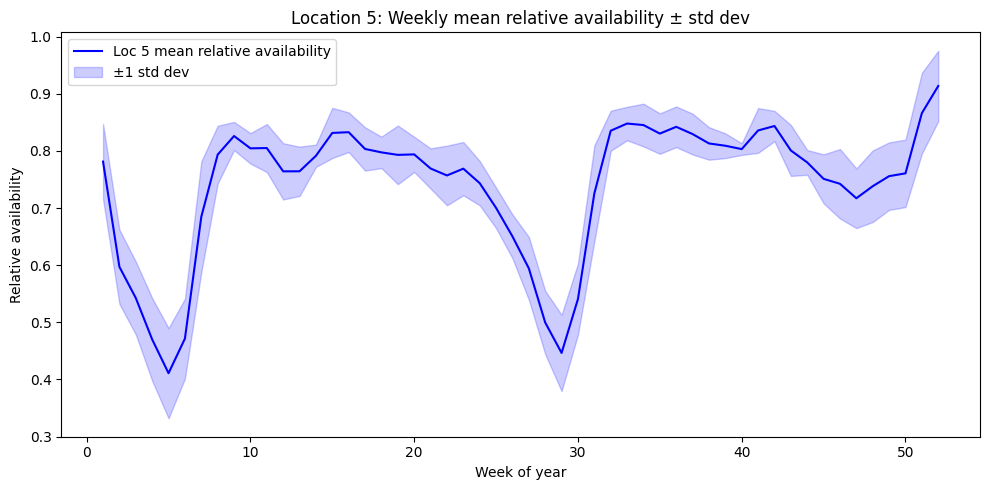

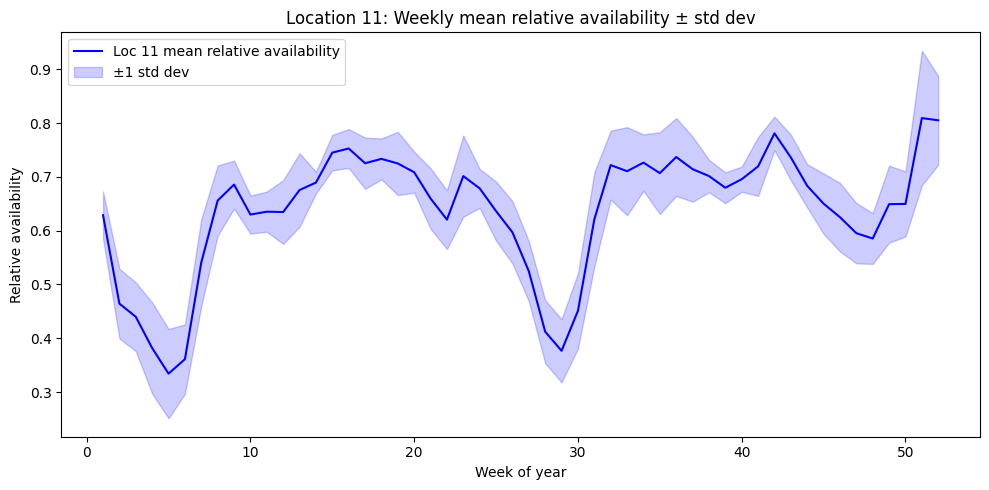

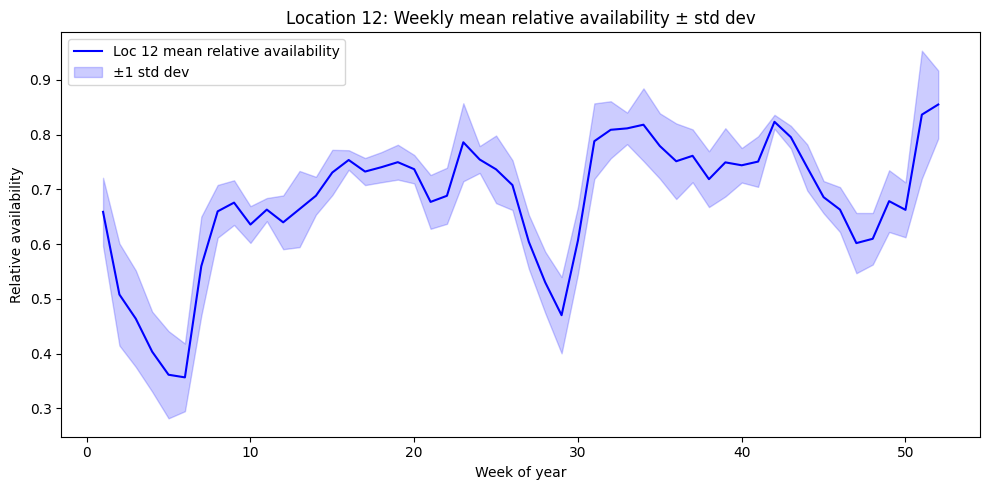

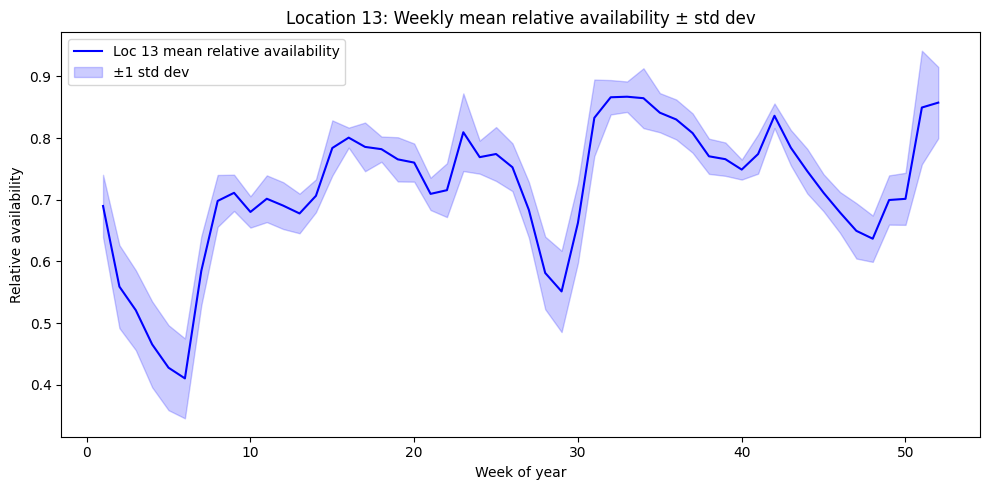

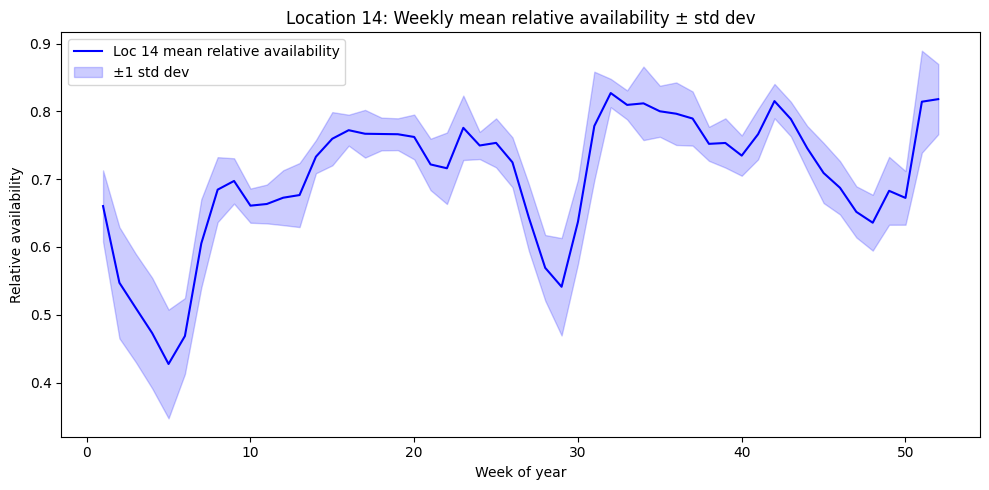

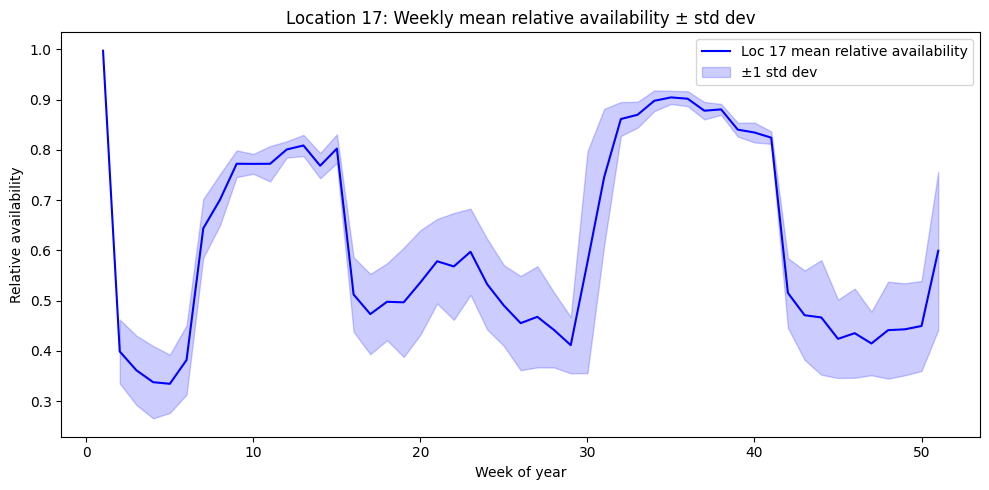

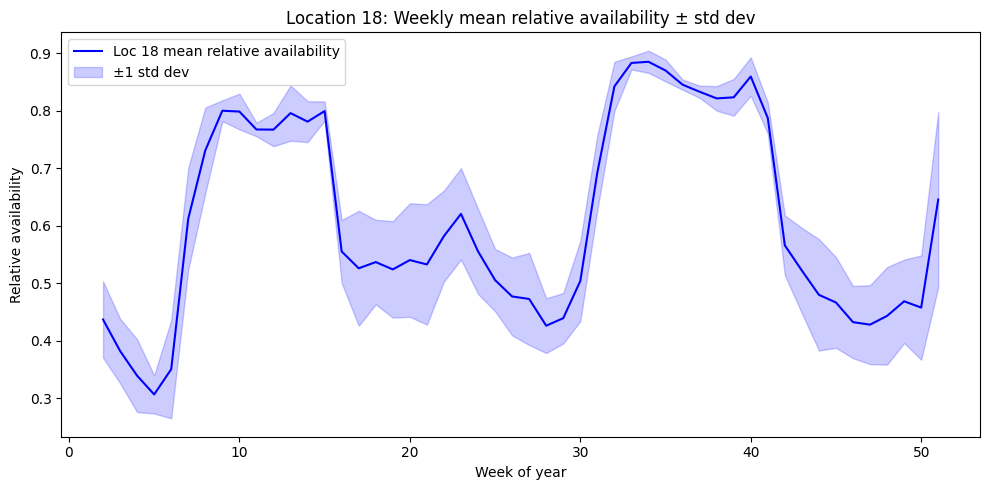

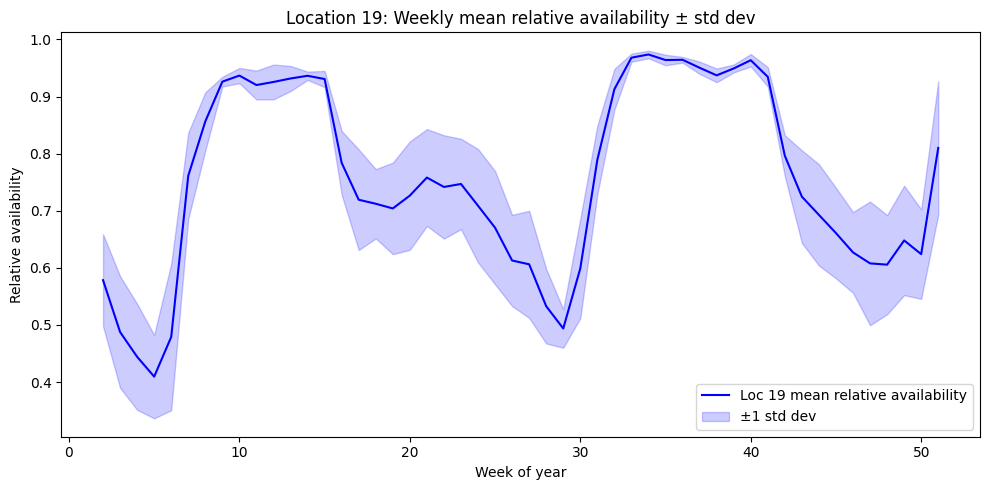

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. Prepare weekly + weekday pivot for plotting using relative_availability ---
loc_weekday = df.groupby(['location_id', 'week_of_year', 'weekday'])['relative_availability'].mean().reset_index()

# Pivot: rows = week_of_year, columns = weekday for each location
pivot_loc = loc_weekday.pivot_table(index='week_of_year', columns=['location_id', 'weekday'], values='relative_availability')

# --- 2. Plot for each location ---
for loc in df['location_id'].unique():
    if loc not in pivot_loc.columns:  # safety check
        continue
    
    plt.figure(figsize=(10,5))
    
    # Extract location data: weekdays as columns
    loc_data = pivot_loc[loc]  # DataFrame: rows=weeks, columns=weekdays
    
    # Compute weekly mean and std across weekdays
    weekly_mean = loc_data.mean(axis=1)  # mean across weekdays per week
    weekly_std = loc_data.std(axis=1)    # std across weekdays per week
    
    # Plot weekly mean line
    plt.plot(weekly_mean.index, weekly_mean.values, label=f'Loc {loc} mean relative availability', color='blue')
    
    # Fill ±1 std deviation
    plt.fill_between(weekly_mean.index,
                     weekly_mean - weekly_std,
                     weekly_mean + weekly_std,
                     color='blue', alpha=0.2, label='±1 std dev')
    
    plt.xlabel('Week of year')
    plt.ylabel('Relative availability')
    plt.title(f'Location {loc}: Weekly mean relative availability ± std dev')
    plt.legend()
    plt.tight_layout()
    plt.show()


## Interpretation
**Overall**
- Overall daily occupancy pattern: Across all locations, the average availability is 0.685 (sd = 0.118) -> There is some variability week to week and weekday to weekday (typical fluctuations are about 12%)
- Overall, the relative availability is fairly stable (sd = 0.118 and variance = 0.014)

**Location data**
- There are high availability locations: 16 and 15 (90% and 85%)
- Locations with moderate availability: 3, 4, 5, 12, 19 (60-75%)
- Lowest availability in location 7 (only 50%)

- Small variances (0.01 - 0.02) speak for stable availability (most days are similar)
- Locations with higher variance (0.03 - 0.04) might have more fluctuation in their usage (might level out when only using the exam phase data)
- Extremly low variance in location 16: Very stable availability



## (3) Going into more detail: Time of Day

Doing basically the same calculations but adding more nuance by considering daytime when calculating the certainty

**Times of day**
 - **Morning:** From `opening` to 11 am
 - **Afternoon:** From 11 am - 17 pm
 - **Evening:** From 17 pm - `closing`(midnight has been fixed to 23:59:59)

C:\Users\User\AppData\Local\Temp\ipykernel_10396\585189821.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['closing'] = pd.to_datetime(df['Closing']).dt.time
C:\Users\User\AppData\Local\Temp\ipykernel_10396\585189821.py:49: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'morning' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[is_morning, 'time_slot'] = 'morning'
C:\Users\User\AppData\Local\Temp\ipykernel_10396\585189821.py:70: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_slots = agg_slots.pivot_table(


Per-location mean and variance (week + weekday + time slot):
    mean_of_weekday_week_means  variance_of_weekday_week_means
6                     0.610968                        0.017559
7                     0.521927                        0.016866
15                    0.867595                        0.008582
16                    0.907942                        0.002872
3                     0.706907                        0.014541
9                     0.673992                        0.013955
10                    0.618171                        0.018670
4                     0.680087                        0.014630
5                     0.768716                        0.013339
11                    0.654754                        0.016626
12                    0.695492                        0.016341
13                    0.733637                        0.013414
14                    0.716898                        0.011388
17                    0.655552                        0.0

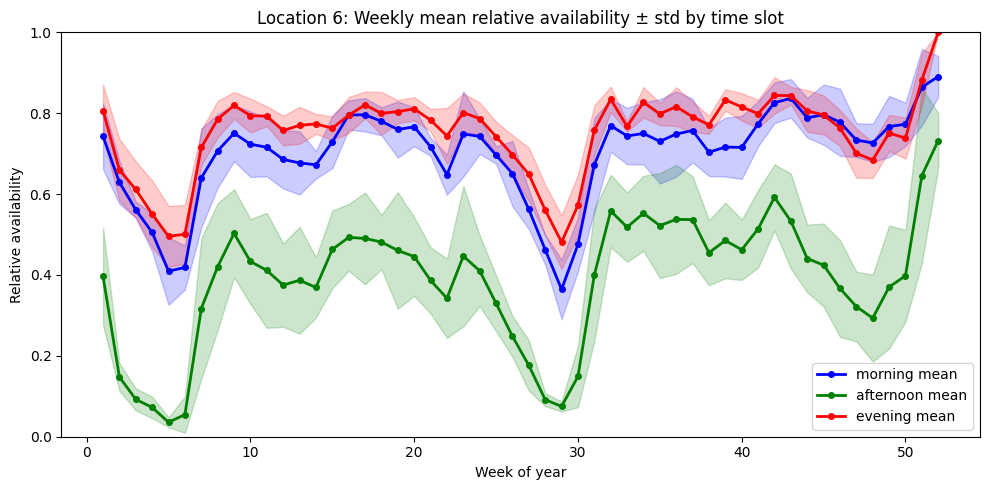

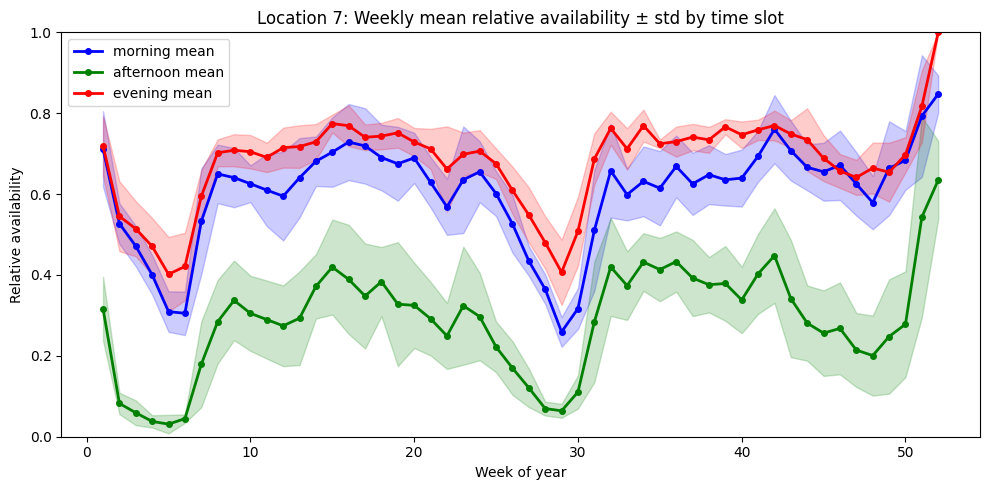

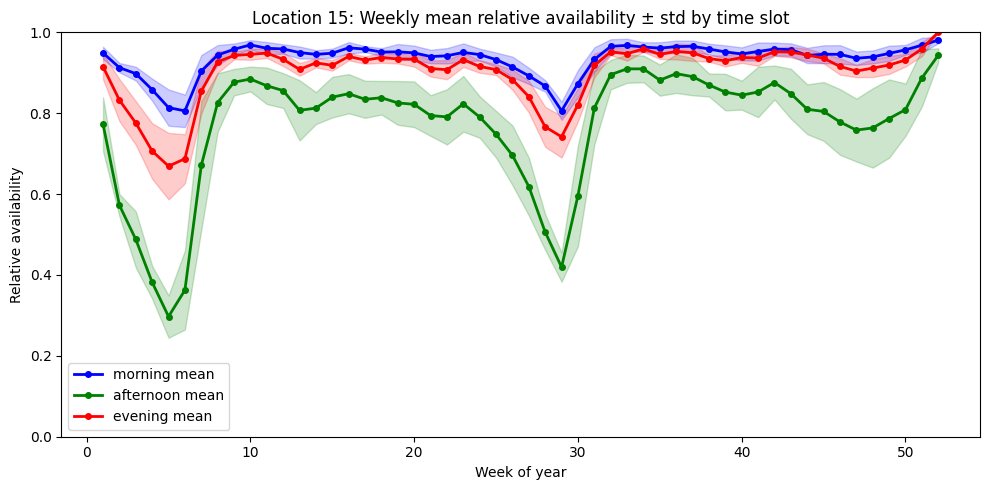

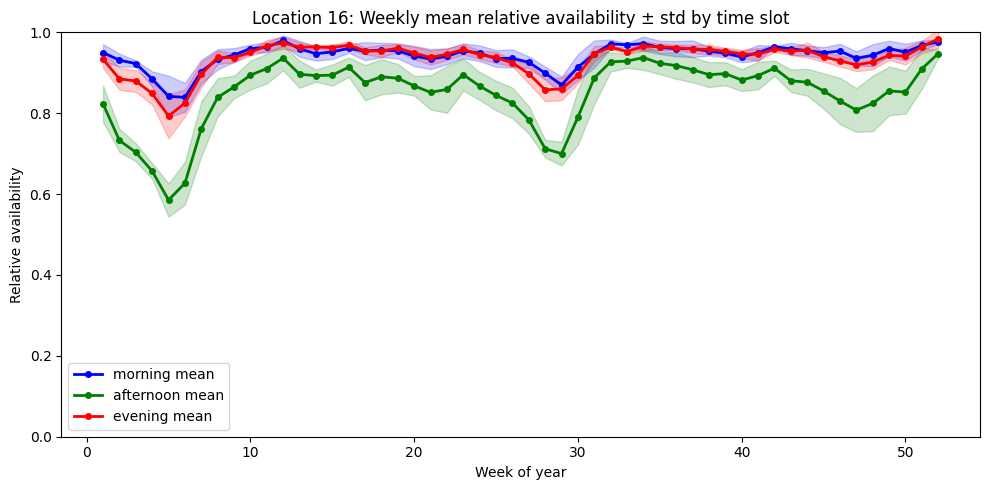

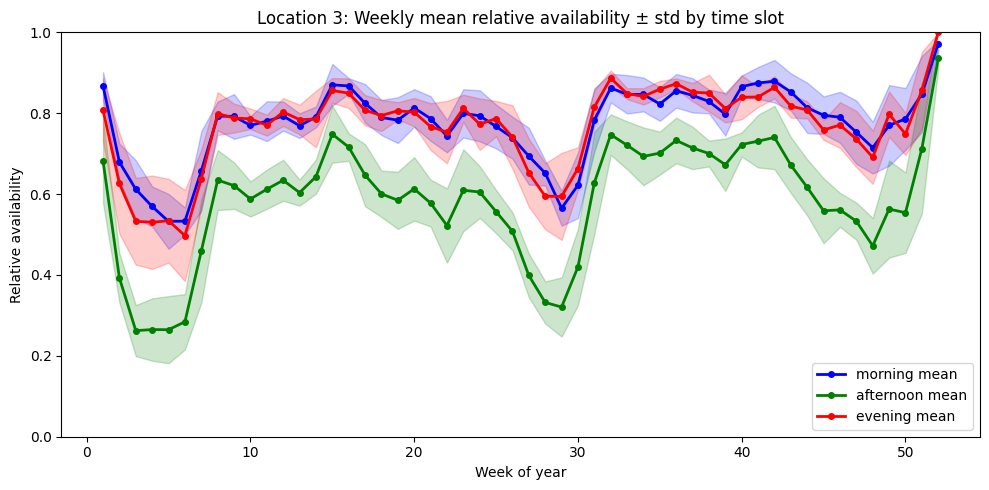

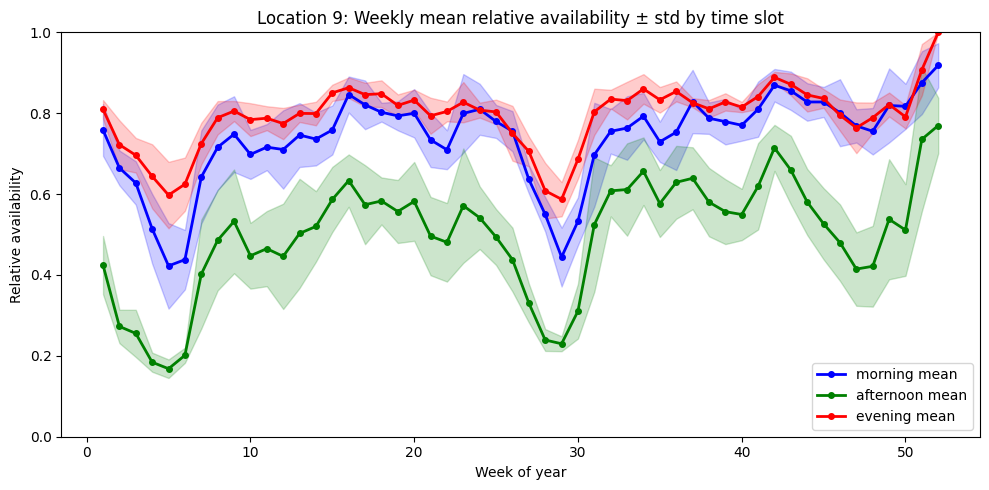

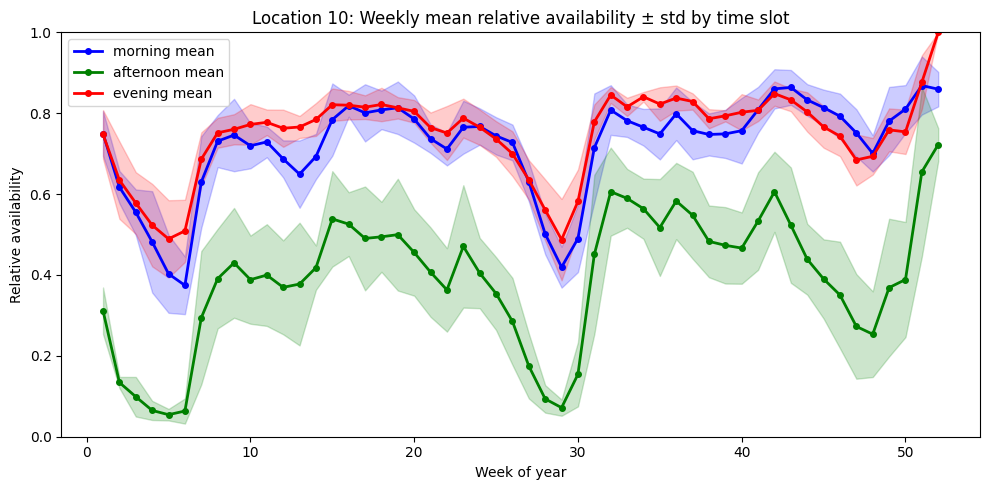

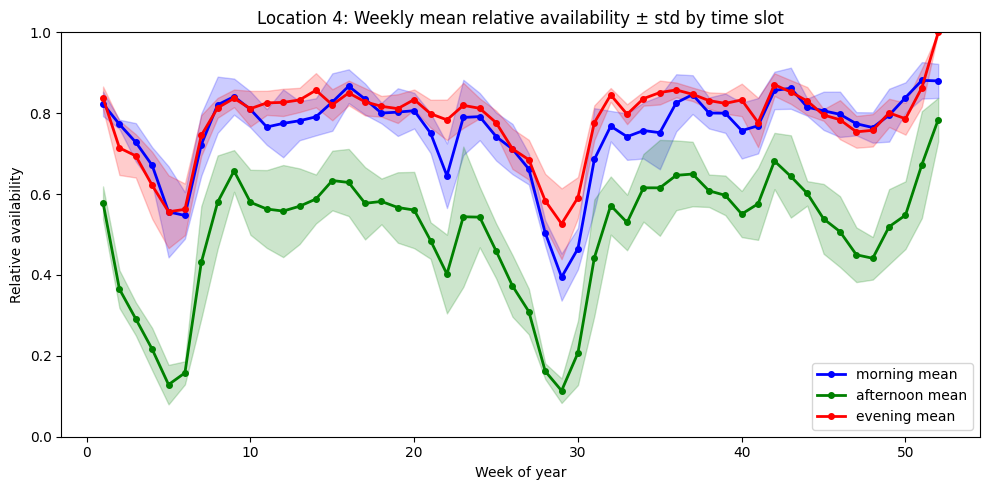

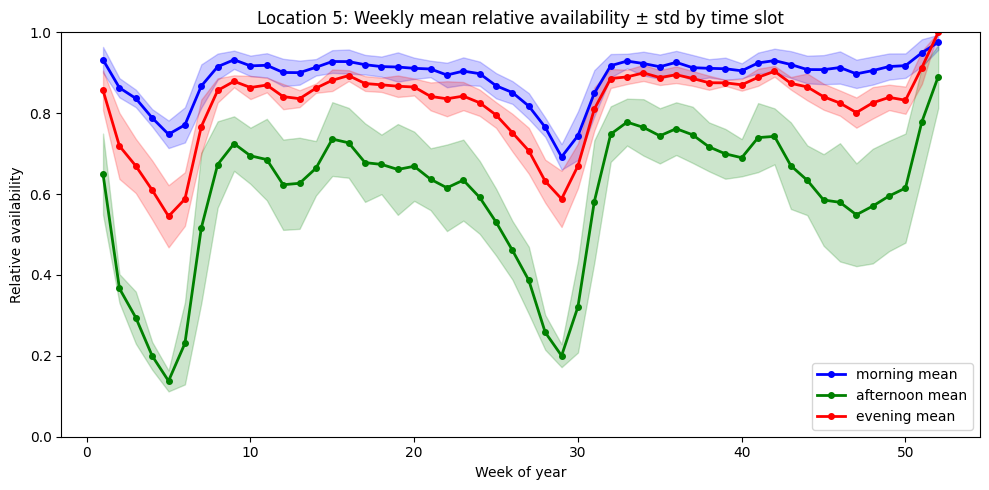

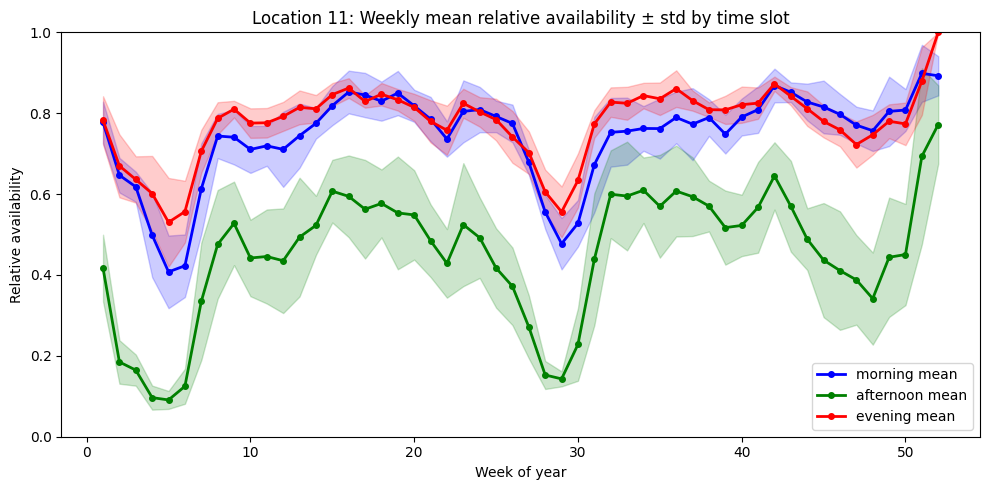

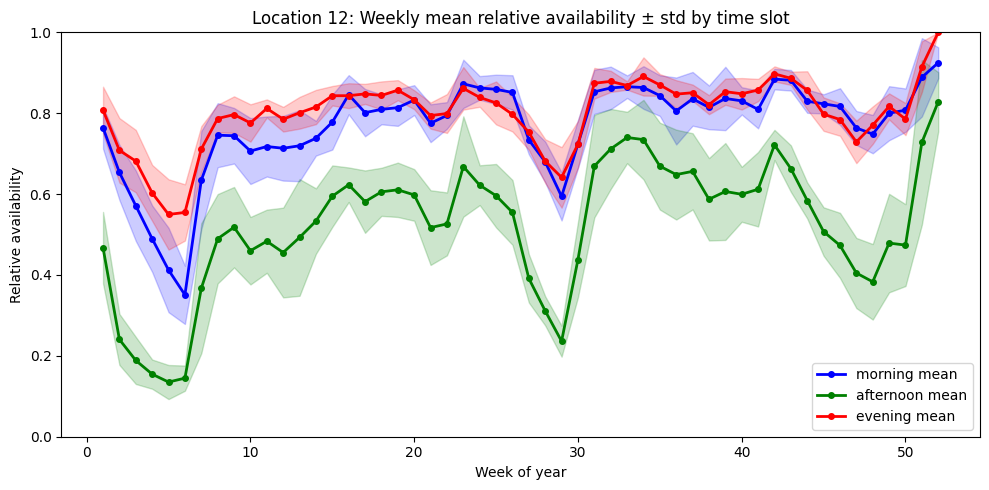

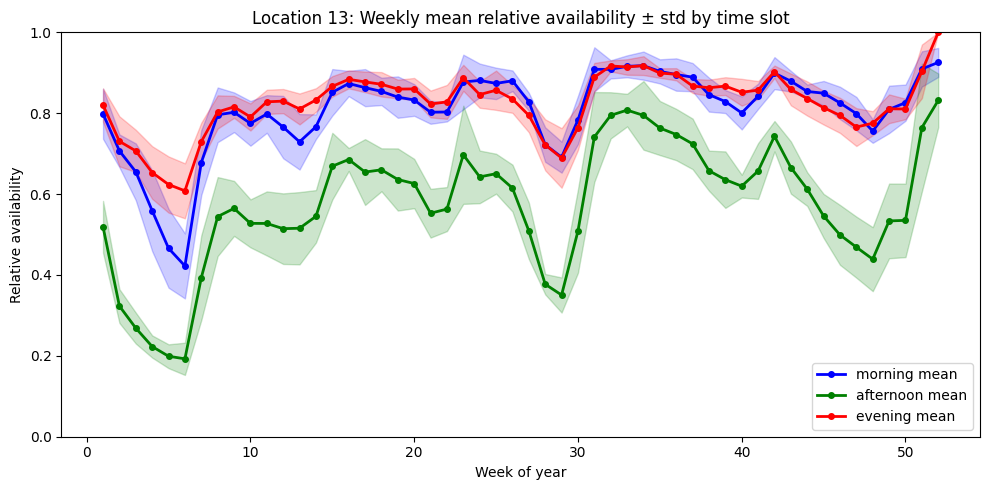

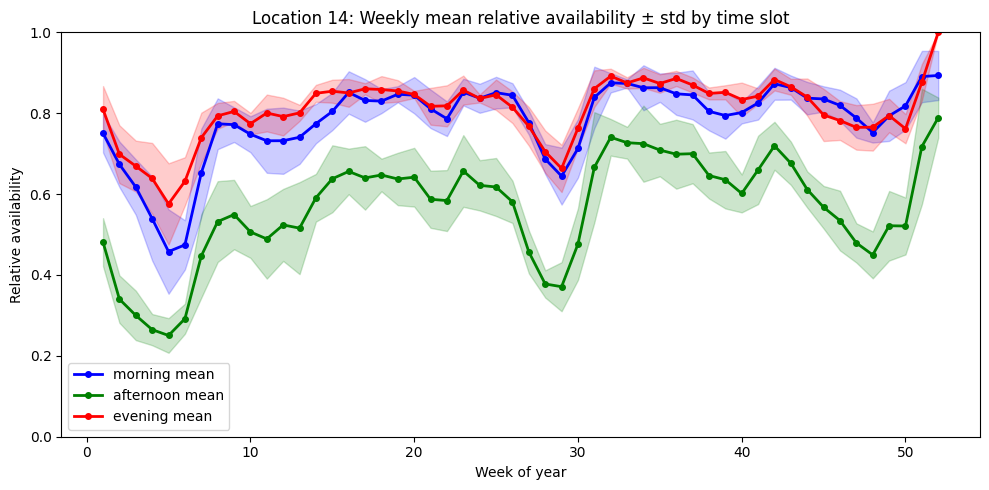

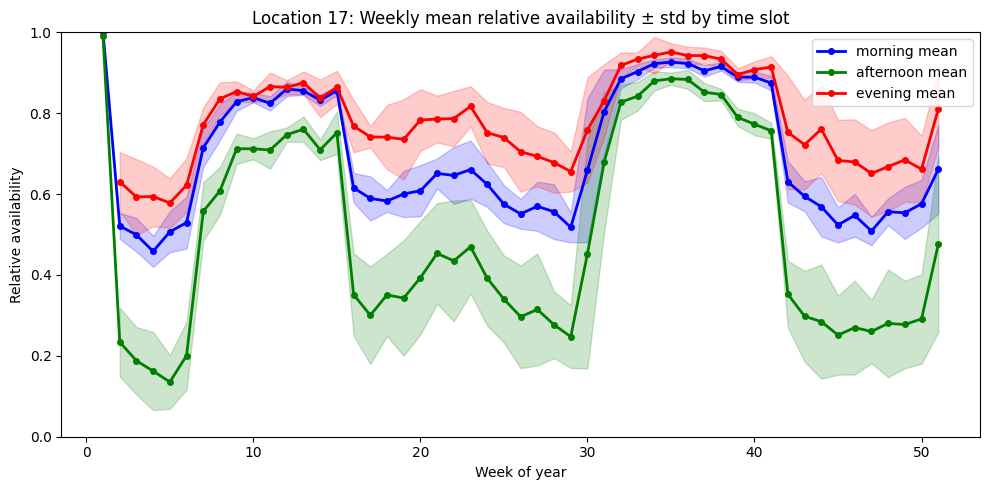

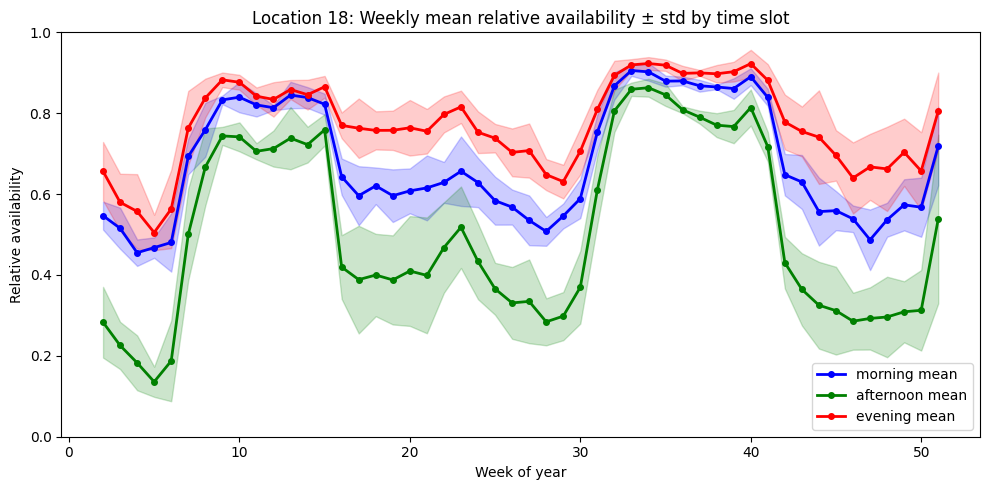

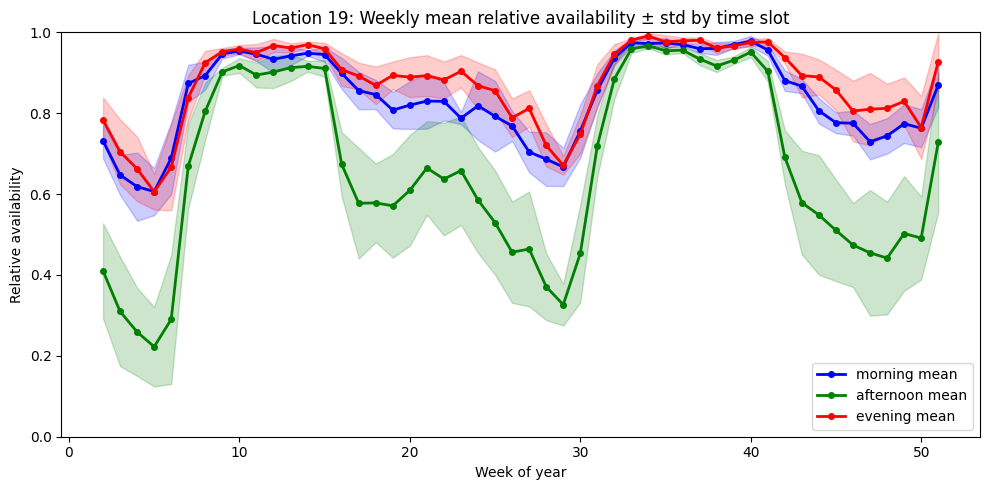

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

# ===========================
# 1. Prepare the dataset
# ===========================

df = dataset.copy()
df = df.dropna(subset=['relative_availability']).copy()  # only rows with availability

# Convert timestamps and opening/closing times
df['t10'] = pd.to_datetime(df['t10'])
df['opening'] = pd.to_datetime(df['Opening']).dt.time
df['closing'] = pd.to_datetime(df['Closing']).dt.time

# Fix midnight: treat 0:00 as 23:59:59 for comparison
def fix_midnight(t):
    if t == datetime.time(0,0,0):
        return datetime.time(23,59,59)
    else:
        return t

df['closing_fixed'] = df['closing'].apply(fix_midnight)

# Extract week of year and weekday
df['week_of_year'] = df['t10'].dt.isocalendar().week
df['weekday'] = df['t10'].dt.weekday  # 0=Monday, 6=Sunday

# ===========================
# 2. Assign time slots (vectorized!)
# ===========================

# Convert t10 to time
t_series = df['t10'].dt.time

# Time thresholds
morning_end = datetime.time(11,0)
afternoon_end = datetime.time(17,0)

# Masks for time slots
is_morning = t_series < morning_end
is_afternoon = (t_series >= morning_end) & (t_series < afternoon_end)
is_evening = t_series >= afternoon_end

# Assign time_slot
df['time_slot'] = np.nan
df.loc[is_morning, 'time_slot'] = 'morning'
df.loc[is_afternoon, 'time_slot'] = 'afternoon'
df.loc[is_evening & (t_series <= df['closing_fixed']), 'time_slot'] = 'evening'

# Drop rows outside opening hours
df = df.dropna(subset=['time_slot'])

# Convert weekday and time_slot to category for speed
df['weekday'] = df['weekday'].astype('category')
df['time_slot'] = df['time_slot'].astype('category')

# ===========================
# 3. Aggregate relative availability per location, week, weekday, time_slot
# ===========================

agg_slots = df.groupby(
    ['location_id', 'week_of_year', 'weekday', 'time_slot'],
    observed=True
)['relative_availability'].mean().reset_index()

# Pivot for plotting: rows=week_of_year, columns=(location_id, time_slot)
pivot_slots = agg_slots.pivot_table(
    index=['week_of_year', 'weekday'],
    columns=['location_id', 'time_slot'],
    values='relative_availability'
)

# ===========================
# 4. Compute per-location stats
# ===========================

location_stats = {}

for loc in df['location_id'].unique():
    loc_cols = [col for col in pivot_slots.columns if col[0]==loc]
    loc_data = pivot_slots[loc_cols]
    
    # Mean and std across weekdays for each week
    weekly_mean = loc_data.mean(axis=1)
    weekly_std = loc_data.std(axis=1)
    
    # Overall mean + variance across all weeks and time slots
    overall_mean = weekly_mean.mean()
    overall_variance = weekly_mean.var()
    
    location_stats[loc] = {
        'weekly_mean': weekly_mean,
        'weekly_std': weekly_std,
        'overall_mean': overall_mean,
        'overall_variance': overall_variance
    }

# Optional: compile summary table
summary_table = pd.DataFrame({
    loc: {
        'mean_of_weekday_week_means': location_stats[loc]['overall_mean'],
        'variance_of_weekday_week_means': location_stats[loc]['overall_variance']
    } for loc in location_stats
}).T

print("Per-location mean and variance (week + weekday + time slot):")
print(summary_table)

# ===========================
# 5. Plot per location (morning/afternoon/evening)
# ===========================

time_slot_colors = {
    'morning': 'blue',
    'afternoon': 'green',
    'evening': 'red'
}

for loc in df['location_id'].unique():
    loc_cols = [col for col in pivot_slots.columns if col[0]==loc]
    loc_data = pivot_slots[loc_cols]
    
    plt.figure(figsize=(10,5))
    
    # Plot each time slot separately
    for slot in ['morning', 'afternoon', 'evening']:
        if (loc, slot) in pivot_slots.columns:
            # Aggregate over weekdays per week
            series = pivot_slots[(loc, slot)].groupby('week_of_year').mean()
            std_series = pivot_slots[(loc, slot)].groupby('week_of_year').std()
            
            # Plot mean line with markers
            plt.plot(series.index, series.values, 
                     label=f'{slot} mean', 
                     lw=2, marker='o', markersize=4,
                     color=time_slot_colors[slot])
            
            # Fill ±1 std deviation
            plt.fill_between(series.index,
                             series - std_series,
                             series + std_series,
                             color=time_slot_colors[slot], alpha=0.2)
    
    plt.xlabel('Week of year')
    plt.ylabel('Relative availability')
    plt.title(f'Location {loc}: Weekly mean relative availability ± std by time slot')
    plt.ylim(0, 1)  # ensure all time slots are visible
    plt.legend()
    plt.tight_layout()
    plt.show()


In [9]:
# ===========================
# 1. Overall mean + variance per time slot
# ===========================

overall_stats = {}

for slot in ['morning', 'afternoon', 'evening']:
    # Get all columns for this time slot across locations
    slot_cols = [col for col in pivot_slots.columns if col[1]==slot]
    if not slot_cols:
        continue
    
    # Flatten all values (ignore NaNs)
    values = pivot_slots[slot_cols].values.flatten()
    values = values[~np.isnan(values)]
    
    overall_stats[slot] = {
        'overall_mean': np.mean(values),
        'overall_variance': np.var(values)
    }

overall_table = pd.DataFrame(overall_stats).T
print("=== Overall mean and variance per time slot ===")
print(overall_table)

# ===========================
# 2. Per-location mean + variance per time slot
# ===========================

location_stats_table = []

for loc in df['location_id'].unique():
    loc_dict = {'location_id': loc}
    
    for slot in ['morning', 'afternoon', 'evening']:
        if (loc, slot) in pivot_slots.columns:
            values = pivot_slots[(loc, slot)].values
            values = values[~np.isnan(values)]
            loc_dict[f'{slot}_mean'] = np.mean(values)
            loc_dict[f'{slot}_variance'] = np.var(values)
        else:
            loc_dict[f'{slot}_mean'] = np.nan
            loc_dict[f'{slot}_variance'] = np.nan
    
    location_stats_table.append(loc_dict)

location_stats_df = pd.DataFrame(location_stats_table)
location_stats_df = location_stats_df.set_index('location_id')

print("\n=== Per-location mean and variance per time slot ===")
print(location_stats_df)


=== Overall mean and variance per time slot ===
           overall_mean  overall_variance
morning        0.774694          0.021611
afternoon      0.537450          0.051635
evening        0.798441          0.013411

=== Per-location mean and variance per time slot ===
             morning_mean  morning_variance  afternoon_mean  \
location_id                                                   
6                0.698837          0.016851        0.385906   
7                0.603902          0.020967        0.286079   
15               0.934747          0.001980        0.767284   
16               0.941733          0.001213        0.848071   
3                0.772762          0.011006        0.582110   
9                0.735773          0.015920        0.495741   
10               0.719202          0.017663        0.389754   
4                0.756495          0.013278        0.502384   
5                0.888954          0.004137        0.597105   
11               0.741078          0.

**Interpretation**

Overall: 
 - relative high availability in the morning (77%) with small variance, which means a fairly consistent pattern in the mornings
 - drop in availability in the afternoon (54%) with a slight increase in variance; more crowding and more variation between libraries
 - evening again with larger availability (80%) and the lowest variance; consitently more free seats in the evenings

Per location:
 - consistent high availability in location 18 and 19 (morning, afternoon, evening) with small variances for all times of day, which means that availability is very predictable
 - lowest availability in 6 and 7 (esp. afternoon)
 - evening availability is constantly high (~67-93%)
 - afternoon variance is generally higher that morning/evening; suggests lower predictability

-----------------

## (4) Exam-Phases only

- I no only used the data from January, Febuary, June, July and August

In [15]:
# Ensure datetime
df['t10'] = pd.to_datetime(df['t10'])

# Extract month
df['month'] = df['t10'].dt.month

# Define exam months
exam_months = [1, 2, 6, 7, 8]

df_exam = df[df['month'].isin(exam_months)].copy()


In [16]:
# Overall stats
overall_exam = (
    df_exam
    .groupby('time_slot')['relative_availability']
    .agg(['mean', 'var'])
)

print("=== Overall exam-phase stats ===")
print(overall_exam)


=== Overall exam-phase stats ===
               mean       var
time_slot                    
afternoon  0.451883  0.088390
evening    0.748907  0.058953
morning    0.713025  0.069282


C:\Users\User\AppData\Local\Temp\ipykernel_10396\2570782636.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('time_slot')['relative_availability']


**Interpretation**

- Afternoons are busiest
- Rather small variances (not a lot of fluctuations but bigger than in the overall data -> maybe we have to make the exam phases a little more specific then just months)
- evenings have the lowest variance and are therefore the most stable (best predictions)

In [17]:
# Per-location exam-phase stats
location_exam = (
    df_exam
    .groupby(['location_id', 'time_slot'])['relative_availability']
    .agg(['mean', 'var'])
    .reset_index()
)

location_exam_pivot = location_exam.pivot(
    index='location_id',
    columns='time_slot',
    values=['mean', 'var']
)

print("=== Per-location exam-phase stats ===")
print(location_exam_pivot)


=== Per-location exam-phase stats ===
                 mean                           var                    
time_slot   afternoon   evening   morning afternoon   evening   morning
location_id                                                            
3            0.496473  0.720412  0.709874  0.082052  0.049631  0.066531
4            0.386747  0.721859  0.675236  0.067447  0.060639  0.064438
5            0.477320  0.752200  0.841020  0.071001  0.050994  0.025259
6            0.282198  0.687388  0.607484  0.068285  0.076742  0.088634
7            0.201914  0.603466  0.494344  0.043949  0.084764  0.082569
9            0.404276  0.740062  0.651725  0.056233  0.052029  0.061264
10           0.289331  0.680363  0.635528  0.065935  0.077462  0.075095
11           0.345021  0.715454  0.653249  0.062551  0.062901  0.064063
12           0.452908  0.759433  0.722147  0.072149  0.051915  0.061628
13           0.518414  0.792008  0.771879  0.062089  0.040043  0.047471
14           0.506417  0.7

C:\Users\User\AppData\Local\Temp\ipykernel_10396\1107512461.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['location_id', 'time_slot'])['relative_availability']


**Interpretation**
- afternoon is always the busiest
- high stress in locations 7, 6, 10 and 11
- moderate but unstable (high variance) are the locations 3, 4, 9, 12, 17 and 18
- highest availability in the afternoons: 15, 16 and 19 (high day-to-day differences in usage)
- highest afternoon variability: 17, 18, 19 (makes afternoons unpredictable)
   -> much lower variability in mornings and evenings (shifting a schedule is highly recommended)

C:\Users\User\AppData\Local\Temp\ipykernel_10396\3092541325.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['location_id', 'time_slot'])['relative_availability']


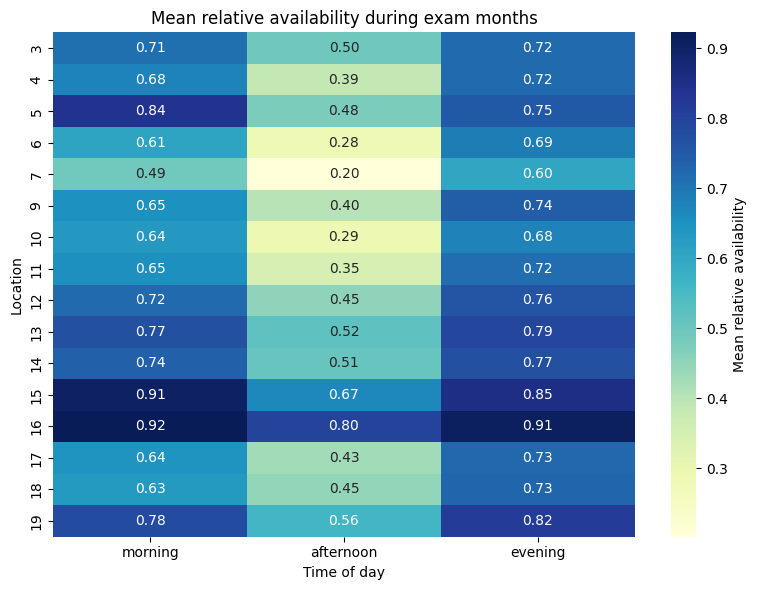

In [18]:
# Vizualization
import seaborn as sns
import matplotlib.pyplot as plt

# Enforce logical order for time slots
time_order = ['morning', 'afternoon', 'evening']

df_exam['time_slot'] = pd.Categorical(
    df_exam['time_slot'],
    categories=time_order,
    ordered=True
)

heatmap_data = (
    df_exam
    .groupby(['location_id', 'time_slot'])['relative_availability']
    .mean()
    .unstack()
)

plt.figure(figsize=(8, 6))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".2f",
    cmap="YlGnBu",
    cbar_kws={'label': 'Mean relative availability'}
)

plt.title("Mean relative availability during exam months")
plt.ylabel("Location")
plt.xlabel("Time of day")
plt.tight_layout()
plt.show()
